# Workflow

This is my first independent machine learning project. I'll try to stay away from tutorials or solutions and compare mine with others later.
My general workflow after loading the data will be:
1. **Describing the data**: Perform exploratory analysis, find patterns.
    * Summary Statistics
    * Scale of Columns
    * Outliers and Leverage
    * Covariance and Important Features
    * Distribution of Columns
2. **Cleaning the Data**: Find problem areas, and correct, impute, or remove. Look for the following:
    * Missing Data (Columns with Nan or Null values)
    * Duplicate Data (Columns with small amounts of unique values)
    * Inconsistent/Inappropriate Values (Values in columns do not follow the same format, Negative when all values should be positive, Typos, Trailing Spaces, etc.)
    * Inconsistent Data Types (Mix of float and object)
3. **Transform Data**: Correct, Scale features, Standardize/Normalize, Featurize Text, Convert Categorial variables to Numerical
4. **Feature Selection and Creation**: Detect and remove irrelevant features, possibly perform dimensionality reduction, and create new features from existing data
5. **Choose Model and Parameters**: Select best model given assumptions and shape of data. Use grid search to tune hyperparameters.
6. **Train Model**

# Loading and Describing the Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
%matplotlib inline
pd.set_option('max_colwidth', 60)
sns.set_theme()

In [3]:
train = pd.read_csv('train.csv')

| Variable | Definition                         | Key                                                |   |
|----------|------------------------------------|----------------------------------------------------|---|
| Survived | Survival                           | 0 \- Died, 1 \- Survived                           |   |
| Pclass   | Ticket Class                       | 1\.\.3 \- 1st class\.\.3rd class                   |   |
| Sex      | Sex                                |                                                    |   |
| Age      | Age in Years                       |                                                    |   |
| Sibsp    | \# of siblings \+ spouses on board |                                                    |   |
| Parch    | \# of parents \+ children on board |                                                    |   |
| Fare     | Passenger fare                     |                                                    |   |
| Ticket   | Ticket Number                      |                                                    |   |
| Embarked | Port of Embarkation                | C \- Cherbourg, Q \- Queenstown, S \- Southhampton |   |
| Cabin    | Cabin Number                       |                                                    |   |

In [4]:
print(str(len(train)) + ' rows')
train.head()

891 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('Numerical Features:')
print(train.select_dtypes(include=[np.number]).columns.tolist())
print('Categorical Features:')
print(train.select_dtypes(include=[np.object]).columns.tolist())

Numerical Features:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Features:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [6]:
train = train.drop(['PassengerId'], axis=1)

We can drop `PassengerId` since it will definitely not have any impact on survival chance, and is just an identifier.

In [7]:
print(train.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [9]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsson, Miss. Elina",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Variable Analysis

## Graphical View

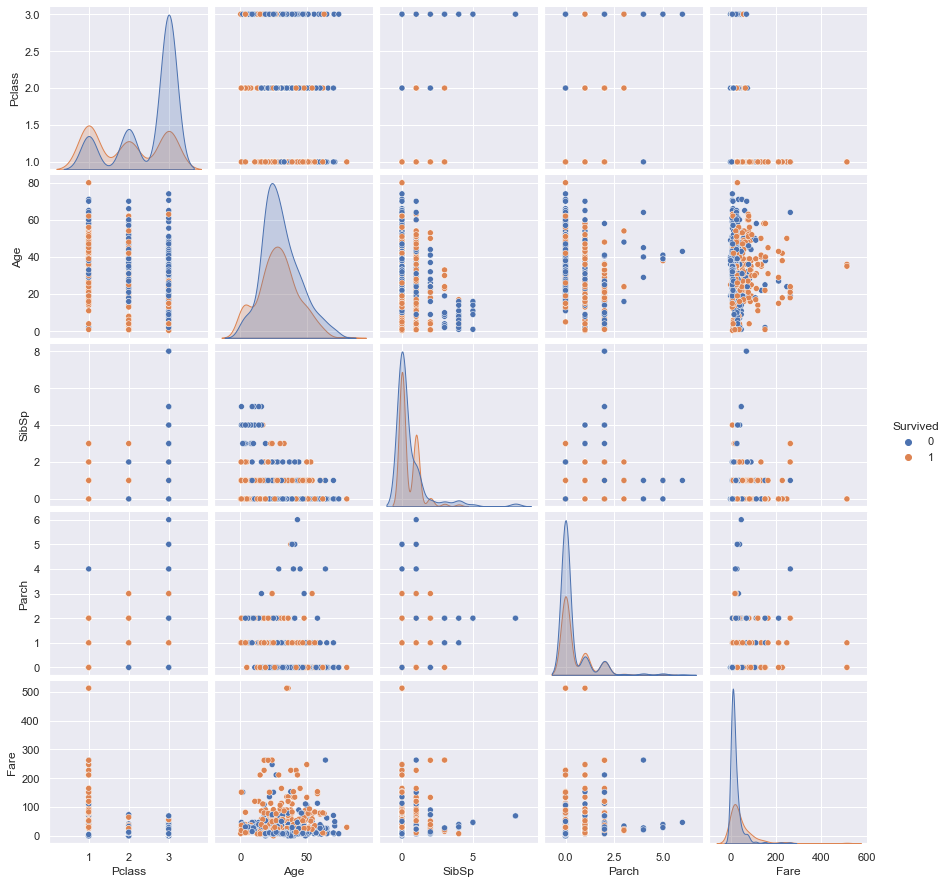

In [12]:
sns.pairplot(train, hue='Survived')
plt.show()

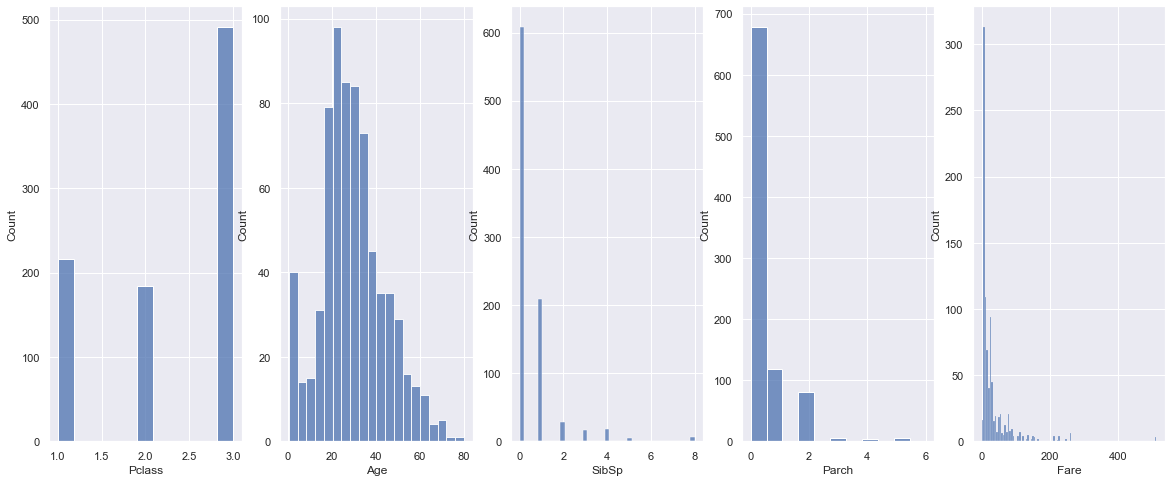

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
numeric_columns = train.drop('Survived', axis=1).select_dtypes(include=[np.number]).columns
for i in range(len(numeric_columns)):
    sns.histplot(ax=axes[i], data=train, x=numeric_columns[i])

## Individual Variables

### Pclass

It already seems that `Pclass = 3` has a lower chance of survival. 

In [14]:
train[['Pclass', 'Survived']].groupby('Pclass').agg(['mean', 'count'])

Survived      
            mean count
Pclass                
1       0.629630   216
2       0.472826   184
3       0.242363   491

Twice the amount of second-class passengers survived over 3rd class passengers. And more 1st class passengers survived over the 2nd class passenger.

### Sex

It seems obvious that more women survived than men.

In [15]:
train[['Sex', 'Survived']].groupby('Sex').agg(['mean', 'count'])

Survived      
            mean count
Sex                   
female  0.742038   314
male    0.188908   577

Group pclass and sex together.

In [16]:
train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).agg(['mean', 'count'])

Survived      
                   mean count
Pclass Sex                   
1      female  0.968085    94
       male    0.368852   122
2      female  0.921053    76
       male    0.157407   108
3      female  0.500000   144
       male    0.135447   347

Even when qualified with a ticket class, more females tend to survive over males

### Embarked

In [17]:
pd.unique(train['Embarked'])

array(['S', 'C', 'Q', nan], dtype=object)

Three possible values for `Embarked`: 'S', 'C', 'Q'. Two rows where `Embarked` is NaN

In [18]:
embarked_notna = train[train['Embarked'].notna()]

In [19]:
train[['Embarked', 'Survived']].groupby('Embarked').agg(['mean', 'count'])

Survived      
              mean count
Embarked                
C         0.553571   168
Q         0.389610    77
S         0.336957   644

It doesn't seem like there is any significant relationship between embarkation port and survival. Except a slight increase in survival if embarked from 'Cherbourg'

In [20]:
train[['Embarked', 'Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Embarked']).agg(['mean', 'count'])

Survived      
                     mean count
Pclass Embarked                
1      C         0.694118    85
       Q         0.500000     2
       S         0.582677   127
2      C         0.529412    17
       Q         0.666667     3
       S         0.463415   164
3      C         0.378788    66
       Q         0.375000    72
       S         0.189802   353

In [21]:
train[['Embarked', 'Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex', 'Embarked']).agg(['mean', 'count'])

Survived      
                            mean count
Pclass Sex    Embarked                
1      female C         0.976744    43
              Q         1.000000     1
              S         0.958333    48
       male   C         0.404762    42
              Q         0.000000     1
              S         0.354430    79
2      female C         1.000000     7
              Q         1.000000     2
              S         0.910448    67
       male   C         0.200000    10
              Q         0.000000     1
              S         0.154639    97
3      female C         0.652174    23
              Q         0.727273    33
              S         0.375000    88
       male   C         0.232558    43
              Q         0.076923    39
              S         0.128302   265

Embarkation significance is unreliable since there are too few observations in certain cases.

In [22]:
train[['Embarked', 'Pclass']].groupby(['Embarked', 'Pclass']).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

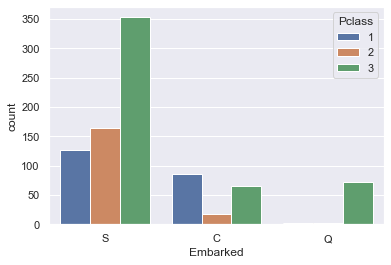

In [23]:
sns.countplot(data=train[['Embarked', 'Pclass']], x='Embarked', hue='Pclass')

It seems that for each embarkation port, the distribution of `Pclass` is different. For Southampton and Queenstown, `Pclass` 3 > 2 > 1, while for Cherbourg, `Pclass` 1 > 3 > 2. This fits in line with the distribution of `Pclass` across the original sample. We can say that the overwhelming majority of 1st and 2nd class passengers came from Southampton and Cherbourg. Cherbourg might also be a wealthier town because of its larger abundance of 1st class passengers, relative to other classes.

In [284]:
train[['Embarked', 'Fare']][train['Embarked'].notna()].groupby('Embarked').agg(['mean', 'std', 'count']).sort_values([('Fare', 'mean')])

Fare                 
               mean        std count
Embarked                            
Q         13.276030  14.188047    77
S         27.079812  35.887993   644
C         59.954144  83.912994   168

### Ticket

There are 681 unique ticket values, and 0 non null values. Probably best that this is not grouped. 

23% of the data is made of duplicate ticket values. Is there a relationship that we can see between ticket number and any other feature?

In [24]:
with np.printoptions(linewidth=130):
    display(np.sort(pd.unique(train[train['Ticket'].notna()]['Ticket'])))

array(['110152', '110413', '110465', '110564', '110813', '111240', '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277', '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509', '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787', '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751', '11752', '11753', '11755', '11765', '11767', '11769',
       '11771', '11774', '11813', '11967', '12233', '12460', '12749', '13049', '13213', '13214', '13502', '13507', '13509',
       '13567', '13568', '14311', '14312', '14313', '14973', '1601', '16966', '16988', '17421', '17453', '17463', '17464',
       '17465', '17466', '17474', '17764', '19877', '19928', '19943', '19947', '19950', '19952', '19972', '19988', '

* `Ticket` values are made up of two parts: an optional prefix designating issuer possibly, and a number for the ticket number. 
* It looks like there are some errors as well: STON/O 2., STON/O2. SC/PARIS and SC/Paris too.
* Could STON be a mistake. Should it be SOTON?
* SOTON is a known abbreviation for Southhampton 

In [25]:
ticket_lastname = pd.DataFrame({
    'Ticket': train['Ticket'], 
    'Name': train['Name'].str.split(', ').str[0]
})
# check for duplicate rows (ticket1, name1), (ticket1, name1)
duplicate_counts = ticket_lastname.pivot_table(index=["Ticket", "Name"], aggfunc="size")

In [26]:
families = duplicate_counts[duplicate_counts.values > 1]
display(families.head(50))
print(f"~{len(families)} families on the titanic")

Ticket   Name         
110413   Taussig          3
111361   Hippach          2
113760   Carter           4
113776   Pears            2
113781   Allison          3
113789   Holverson        2
113803   Futrelle         2
113806   Chambers         2
11668    Turpin           2
11751    Beckwith         2
11967    Bishop           2
13507    Silvey           2
1601     Lam              2
17421    Thayer           3
17453    Goldenberg       2
17474    Dick             2
19928    Minahan          2
19943    Hoyt             2
19950    Fortune          4
19996    Taylor           2
220845   Herman           2
230080   Navratil         3
230136   Becker           2
231919   Doling           2
237736   Nasser           2
243847   Jacobsohn        2
244252   Carter           2
244367   Kantor           2
248727   Harper           2
248738   Caldwell         2
250644   Mellinger        2
250649   Hamalainen       2
26360    Quick            2
2651     Nicola-Yarred    2
2653     Nakid           

~99 families on the titanic


It seems that tickets and names have a correlation. In particular, families/spouses will have the same ticket number. 

Pick a random family of 4 and inspect full traits.

In [27]:
train[(train["Ticket"] == '2666') & (train["Name"].str.contains('Baclini'))]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
448,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
858,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.00,0,3,2666,19.2583,NaN,C


> Fun fact: Latifa boarded the Titanic at Cherbourg with her three daughters: Eugenie, Helene Barbara and Maria Catherine. They were travelling from their home in Syria (now Lebanon - they would have considered themselves to be Lebanese) to join Latifa's husband who was already in New York. They were not originally scheduled to travel on the Titanic but Maria developed conjunctivitis (pick eye) and they had to abandon plans to board their original ship in Cherbourg, until it cleared up.

In [28]:
train[(train["Ticket"] == '110413') & (train["Name"].str.contains('Taussig'))]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
262,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
558,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S
585,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S


Mr. Emil Taussig, probably the father, didn't survive. Very sad. Another relationsip we can see is that family members likely had **similar cabins**. So if we find a family member, with an unknown cabin value, we can look to other family members. For cabins, the exact cabin number shouldn't matter that much, so we can also just look at the deck values. Family members also have the **same embarkation port**, and have the **same fare**. 

Because `Pclass` represents the ticket class, we can assume that identical tickets will have identical `Pclass` values. 

Let's see if there are any significant relationships between `Ticket`, and `Fare`/`Embarkation`

In [29]:
ticket_fares_equal = train.groupby('Ticket')['Fare'].nunique().eq(1)
display(ticket_fares_equal[ticket_fares_equal.values == False])
print(f"{len(ticket_fares_equal)} unique tickets")

Ticket
7534    False
Name: Fare, dtype: bool

681 unique tickets


In [30]:
train[train["Ticket"] == '7534']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
138,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S
876,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S


Identical tickets have identical fares except Ticket 7534. Apparently these two were traveling companions. This might be an error, but can't be sure.

### Name

Name at this point seems like just an identifier, without any significance to survival. There are titles on each name that could indicate an age range, but from earlier analysis, we saw that even toddlers have a title. Let's try to extract the titles, which seem to follow the pattern of `{title}.`.

In [31]:
name_age = train.loc[:, ["Name", "Age"]][train["Age"].notna()]

name_age["Name"] = name_age["Name"].str.extract(r'(\w*)\..*$', expand=False)
print(f"{name_age['Name'].isna().sum()} null values")

0 null values


In [32]:
titles = pd.unique(name_age["Name"])
with np.printoptions(linewidth=130):
    display(titles)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

It seems that every person has some title attached to them. 

In [33]:
name_age.groupby("Name").agg(['mean', 'std', 'count'])

Age                 
               mean        std count
Name                                
Capt      70.000000        NaN     1
Col       58.000000   2.828427     2
Countess  33.000000        NaN     1
Don       40.000000        NaN     1
Dr        42.000000  12.016655     6
Jonkheer  38.000000        NaN     1
Lady      48.000000        NaN     1
Major     48.500000   4.949747     2
Master     4.574167   3.619872    36
Miss      21.773973  12.990292   146
Mlle      24.000000   0.000000     2
Mme       24.000000        NaN     1
Mr        32.368090  12.708793   398
Mrs       35.898148  11.433628   108
Ms        28.000000        NaN     1
Rev       43.166667  13.136463     6
Sir       49.000000        NaN     1

These mean age values can be used to impute missing values.

At this point, I have `Fare`, `Cabin`, `Age` to analyze

### Fare

We saw earlier there is a relationship between `Fare` and families. There could be a significant relationship betwen `Fare` and `Ticket` as well, but Ticket 7534 showed two `Fare` values that weren't the same (although they were very similar), but maybe this was a clerical error. 

It makes sense there is a relationship `Pclass` and `Fare`. A `Pclass` of 1 corresponds to a higher `Fare`. AKA `Fare` decreases with `Pclass`. 

We also saw in the graphical view that a higher `Fare` corresponds to a greater survival chance, which makes sense if we assume a lower `Pclass` value corresponds to a high `Fare`. 

We can also see if embarkation ports have a higher or lower average fare associated with it as well.

In [34]:
embarked_mapping = {'Embarked': {'S': 0, 'C': 1, 'Q': 2}}
reversed_mapping = {value: key for key, value in embarked_mapping['Embarked'].items()}

In [35]:
embarked_fare = train[train["Embarked"].notna()].loc[:, ['Embarked', 'Fare']]

In [36]:
embarked_fare = embarked_fare.replace(embarked_mapping)

In [37]:
embarked_groups = embarked_fare.groupby('Embarked').agg(['mean', 'std', 'count'])
embarked_groups.rename(reversed_mapping).sort_values(by=('Fare', 'mean'))

Fare                 
               mean        std count
Embarked                            
Q         13.276030  14.188047    77
S         27.079812  35.887993   644
C         59.954144  83.912994   168

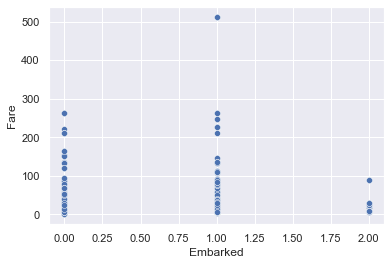

In [38]:
sns.scatterplot(data=embarked_fare, x='Embarked', y='Fare')
plt.show()

Passengers embarking from Southampton have a lower average fare than Cherbourg, but a graphical view shows that there are outlier in Cherbourg driving up the average.

In [39]:
train[train['Fare'] > 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


These are the passengers driving up the average fare in Cherbourg.

In [40]:
train[train["Name"].str.contains('Cardeza')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


Apparently Mr. Thomas Drake Martinez Cardeza, an entrepeneur, boarded with his mother Charlotte Cardeza, but she is not present in the sample. The Cardezas boarded with Anna Ward, Charlotte's maid, and Gustave Lesurer, Thomas' manservant. They were all rescued on lifeboat 3.

Removing these 3 passengers brings this result.

In [41]:
embarked_fare = embarked_fare.drop([258, 679, 737])
embarked_groups = embarked_fare.groupby('Embarked').agg(['mean', 'std', 'count'])
embarked_groups.rename(reversed_mapping).sort_values(by=('Fare', 'mean'))

Fare                 
               mean        std count
Embarked                            
Q         13.276030  14.188047    77
S         27.079812  35.887993   644
C         51.729143  57.953950   165

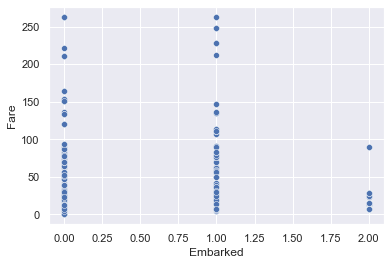

In [42]:
sns.scatterplot(data=embarked_fare, x='Embarked', y='Fare')
plt.show()

There is still no conclusive evidence that `Embarked` has any real effect on `Fare`. But passengers that embarked from Queenstown do definitely have a lower fare. Let's look at the relationship between `Fare` and `Pclass`.

In [43]:
train[['Pclass', 'Fare']].groupby('Pclass').agg(['mean', 'std', 'count'])

Fare                 
             mean        std count
Pclass                            
1       84.154687  78.380373   216
2       20.662183  13.417399   184
3       13.675550  11.778142   491

`Fare` decreases with `Pclass`, and again there is large standard deviation. There might be some $0 fares.

In [44]:
zero_fares = train[train['Fare'] == 0]
zero_fares

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Some of these passengers have a `Ticket` value of LINE. This might imply they are special. Apparently, Lionel Leonard was born Andrew Shannon and was a member of the navy. An employee of American LINE, he was quartermaster of the SS Philadelphia, which was scheduled to leave for New York, but because of scheduling reasons, had to board the Titanic as 3rd class passengers instead. He boarded under ticket 370160. LINE could be another name for ticket 370160, and also represents employment under American LINE. William Henry Thornquist also boarded under ticket 370160, as was William Johnson, and Alfred Johnson.

Passenger William Harrison was a secretary to Bruce Ismay, the then chairman of the White Star Line, which produced the Titanic. Richard Fry was Ismay's valet. Francis Parkes and others were part of *Harland and Wolff's* "guarantee group," a group chosen to oversee the running of the Titanic's voyage. 8 out of 9 of the "guarantee group" is present in the sample. Reuchlin was another special passenger.

All these passengers were either people tasked with running the Titanic, or were special passengers.

Because these passengers represent special cases/anomalies, maybe it's best to remove these observations. We can also try creating a range instead to account for these passengers.

### Cabin

In [45]:
print(f"{train['Cabin'].isna().sum()} null values out of {len(train['Cabin'])}")

687 null values out of 891


The large number of missing values suggests that the `Cabin` variable should be removed. But it does make sense that `Cabin` would contribute to survival. Given the available sample of `Cabin`, extract the deck value and see how it contributes to survival.

In [46]:
cabin_survived = train.loc[:, ['Cabin', 'Pclass', 'Fare', 'Age', 'Survived']][train['Cabin'].notna()]
decks = cabin_survived['Cabin'].str.extractall(r'([A-Za-z])')
unique_decks = np.sort(pd.unique(decks.values.ravel()))
unique_decks

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)

In [47]:
new_data = []
repeated_columns = cabin_survived.columns.drop('Cabin')
columns = repeated_columns.insert(0, 'Deck')
for _, data in cabin_survived.iterrows():
    cabin_decks = [re.search('([a-zA-Z])', cabin).group(1) for cabin in data['Cabin'].split()]
    repeated_data = ([data[col]] * len(cabin_decks) for col in repeated_columns)
    new_data.extend(zip(cabin_decks, *repeated_data))
deck_survived = pd.DataFrame(new_data, columns=columns)
deck_survived.groupby('Deck').agg(['mean', 'std', 'count'])

Pclass                        Fare                          Age  \
          mean       std count        mean         std count       mean   
Deck                                                                      
A     1.000000  0.000000    15   39.623887   17.975333    15  44.833333   
B     1.000000  0.000000    64  140.592514  126.898444    64  32.983871   
C     1.000000  0.000000    71  122.466255   83.408367    71  34.068889   
D     1.117647  0.327035    34   57.424391   29.159863    34  38.531250   
E     1.363636  0.699025    33   45.309470   32.358145    33  38.116667   
F     2.384615  0.506370    13   18.696792   11.728217    13  19.954545   
G     3.000000  0.000000     7   11.039286    4.066418     7  20.714286   
T     1.000000       NaN     1   35.500000         NaN     1  45.000000   

                       Survived                  
            std count      mean       std count  
Deck                                             
A     20.171237    12  0.466667  0.516398    15  
B     14.743147    62  0.750000  0.436436    64  
C     15.916883    63  0.577465  0.497479    71  
D     14.504692    32  0.764706  0.430562    34  
E     12.590146    30  0.757576  0.435194    33  
F     15.182975    11  0.615385  0.506370    13  
G     14.044148     7  0.285714  0.487950     7  
T           NaN     1  0.000000       NaN     1

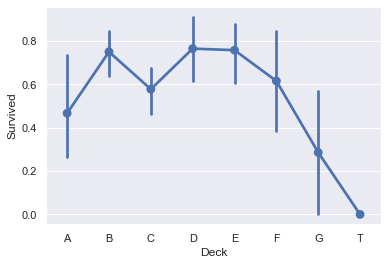

In [48]:
sns.pointplot(data=deck_survived, x='Deck', y='Survived', order=unique_decks)
plt.show()

Lower cabin decks have a higher `Pclass`, and a lower `Fare`. Cabin doesn't seem to affect `Age` or `Age` Cabin. But `Cabin` seems to have an effect on `Survived`. Passengers on cabin deck G had a much lower chance of survival than other passengers. Whoever is on cabin T seems to be an outlier. And cabin decks A - F don't show a clear pattern. Passengers on cabin decks B, D, and E have the highest chance of survival but passengers on cabin decks A, C, and F have a much lower chance of survival. The sample size is small however, so it's difficult to draw concrete conclusions.

It also looks like the B and C decks were most expensive.

### Age

Age might later be separated into age bands. Consider arbitrary groups for now to see best way to partition age. 

In [257]:
filled_ages = train[train['Age'].notna()].loc[:, ['Age', 'Survived', 'SibSp', 'Parch', 'Fare']]
age_groups = [0, 16, np.inf]

age_group_series = pd.cut(filled_ages['Age'].to_numpy(), bins=age_groups, precision=0)
age_group_series

[(16.0, inf], (16.0, inf], (16.0, inf], (16.0, inf], (16.0, inf], ..., (16.0, inf], (16.0, inf], (16.0, inf], (16.0, inf], (16.0, inf]]
Length: 714
Categories (2, interval[float64]): [(0.0, 16.0] < (16.0, inf]]

Have an arbitrary range for children, an arbitrary age for young adults,  another arbitrary range for adults, and an age range for outliers. Set the cutoff for outlier as 63 to divide into equal groups of 3 where the outlier group is 63+

In [258]:
filled_ages.groupby(by=age_group_series).agg(['mean', 'std', 'count'])

Age                   Survived                     SibSp  \
                  mean        std count      mean       std count      mean   
(0.0, 16.0]   8.006700   5.634042   100  0.550000  0.500000   100  1.570000   
(16.0, inf]  33.232085  12.290275   614  0.382736  0.486451   614  0.340391   

                                Parch                       Fare             \
                  std count      mean       std count       mean        std   
(0.0, 16.0]  1.653005   100  1.140000  0.765678   100  31.588877  31.882021   
(16.0, inf]  0.593409   614  0.315961  0.810518   614  35.200318  55.599111   

                   
            count  
(0.0, 16.0]   100  
(16.0, inf]   614

Possibly separate into 2 age groups: children, and adults. The graphical view doesn't show that much of a correlation between survival and age in higher age groups, but there is a higher chance of surviving if in a lower age group. The Titanic classified children as people under the ages of 12, but this restriction can be modified slightly as it's unlikely all people over the age of 12 were not put in lifeboats simply because they were technically adults. I chose 16 just cuz. I'll figure out how to pick a better cutoff later.

It seems a lower age is also correlated with a lower fare.

In [259]:
train[['Age', 'Pclass', 'Fare']][train['Age'].notna()].groupby(['Pclass', age_group_series]).agg(['mean', 'count'])

Age              Fare      
                         mean count        mean count
Pclass                                               
1      (0.0, 16.0]  10.546667     9  113.352778     9
       (16.0, inf]  39.641243   177   86.670505   177
2      (0.0, 16.0]   5.634762    21   27.364486    21
       (16.0, inf]  33.226974   152   20.657401   152
3      (0.0, 16.0]   8.391714    70   22.343693    70
       (16.0, inf]  29.254386   285   10.990846   285

So it looks like I was wrong. Children do not really have a lower rate. The earlier results could be because 3rd class passengers are more likely to bring children with them. It does look like families pay more however. 

In [261]:
train[train['Age'].notna()][['Age', 'Pclass']].groupby(age_group_series).mean()

,Age,Pclass
"(0.0, 16.0]",8.006700,2.610000
"(16.0, inf]",33.232085,2.175896


Children are made up of more 3rd class passengers than adults.

### Parch and Sibsp

In [277]:
parch_sibsp_data = train[['Parch', 'SibSp', 'Pclass', 'Fare', 'Survived', 'Age']]

In [278]:
parch_sibsp_data.groupby('Parch').agg(['mean', 'std', 'count'])

SibSp                    Pclass                       Fare  \
           mean       std count      mean       std count       mean   
Parch                                                                  
0      0.237463  0.496321   678  2.321534  0.836665   678  25.586774   
1      1.084746  1.144114   118  2.203390  0.832659   118  46.778180   
2      2.062500  2.451265    80  2.275000  0.856472    80  64.337604   
3      1.000000  0.707107     5  2.600000  0.547723     5  25.951660   
4      0.750000  0.500000     4  2.500000  1.000000     4  84.968750   
5      0.600000  0.547723     5  3.000000  0.000000     5  32.550000   
6      1.000000       NaN     1  3.000000       NaN     1  46.900000   

                         Survived                        Age                   
              std count      mean       std count       mean        std count  
Parch                                                                          
0       41.878786   678  0.343658  0.475279   678  32.178503  12.570448   521  
1       63.709430   118  0.550847  0.499529   118  24.422000  18.283117   110  
2       65.993088    80  0.500000  0.503155    80  17.216912  13.193924    68  
3        7.862611     5  0.600000  0.547723     5  33.200000  16.709279     5  
4      118.731099     4  0.000000  0.000000     4  44.500000  14.617341     4  
5        4.101134     5  0.200000  0.447214     5  39.200000   1.095445     5  
6             NaN     1  0.000000       NaN     1  43.000000        NaN     1

In [279]:
parch_sibsp_data.groupby('SibSp').agg(['mean', 'std', 'count'])

Parch                    Pclass                       Fare  \
           mean       std count      mean       std count       mean   
SibSp                                                                  
0      0.185855  0.585377   608  2.351974  0.824539   608  25.692028   
1      0.655502  1.049716   209  2.057416  0.858529   209  44.147370   
2      0.642857  0.869835    28  2.357143  0.780042    28  51.753718   
3      1.312500  0.704154    16  2.562500  0.813941    16  68.908862   
4      1.500000  0.514496    18  3.000000  0.000000    18  31.855556   
5      2.000000  0.000000     5  3.000000  0.000000     5  46.900000   
8      2.000000  0.000000     7  3.000000  0.000000     7  69.550000   

                        Survived                        Age                   
             std count      mean       std count       mean        std count  
SibSp                                                                         
0      49.733052   608  0.345395  0.475888   608  31.397558  13.647767   471  
1      40.380919   209  0.535885  0.499908   209  30.089727  14.645033   183  
2      66.225403    28  0.464286  0.507875    28  22.620000  14.679230    25  
3      96.355121    16  0.250000  0.447214    16  13.916667  11.317391    12  
4       7.322546    18  0.166667  0.383482    18   7.055556   4.880601    18  
5       0.000000     5  0.000000  0.000000     5  10.200000   5.805170     5  
8       0.000000     7  0.000000  0.000000     7        NaN        NaN     0

It looks like we can't make any definite conclusions about `Parch` and `Sibsp`'s relationships to `Survived`. But we can see generally, age decreases against an increase in `Sibsp`. We can probably combine the two features to create a single family size feature.

## Summary

* `Pclass` highly contributes to survival, with more 1st class passengers surviving over 3rd class passengers
---
* `Sex` highly contributes to survival, with more female passengers surviving over male passengers, even when qualified with `Pclass`
---
* Passengers with an `Embarked` value of C tend to survive more but that may be because there is just a larger number of 1st class passengers who embarked from there. 
* When grouped with `Embarked`, `Sex` and `Pclass` correlations to survival hold
* More 1st class passengers embarked from S than C, and more 1st class passengers embarked from C than Q. In general, more passengers embarked from S than C, and C than Q. Queenstown is made up mostly of 3rd class passengers, and Cherbourg has more 1st class passengers than 3rd or 2nd class passengers.
* No definite relationship between `Embarked` and `Survival` except what can be explained by `Pclass`
* **`Embarked` may be a removable feature, but can still be used for feature engineering**
---
* `Ticket` contains some mistakes in spelling (STON vs SOTON, PARIS vs Paris)
* Passengers who rode together have the same ticket number, allowing us to group into travel groups/families
* Passengers with the same ticket value also have the same `Fare` (usually), similar `cabins`, and the same `Embarked` value
---
* `Name` consists of several titles. Each passenger has some kind of title. 
* The title can be used to impute age values.
---
* `Fare` is correlated slightly with `Embarked`, but only because there is a higher percentage of 1st class passengers in `Embarked == C`. In `Embarked == S`, the mean fare is slightly lower than `Embarked == C`.
* There is an outlier `Fare`, a passenger embarking from Cherbourg, Thomas Cardeza.
---
* `Cabin == B, Cabin == C` has the highest survival rates. These are also the most expensive cabins, and contain the majority of 1st class passengers.
* `Cabin` should consist of only the deck values, not the number.
* There are 687 null values, so we might have to remove this column so we don't introduce too much noise.
---
* `Age` is missing 177 values
* `Age` should be imputed since there is a spike in survival in the lower age range.
* We might be able to consider using feature bands instead of definite values to reduce granularity.
---
* There is no significant relationship between `Parch` and `Survived`, and `Sibsp` and `Survived`, but there is a spike in survival when `Sibsp` is greater than 2. A `Sibsp` greater than 2 means that you are in the younger range, since you can only have 1 spouse.
* For `Parch`, the relationship is less clear